 Авторегрессионная модель порядка 3 (AR(3)) представляет собой модель временного ряда, где текущее значение зависит от трех предыдущих значений, а также от случайной ошибки. Стационарность временного ряда означает, что его статистические характеристики, такие как среднее и дисперсия, не зависят от времени. Проверка проводится с использованием теста на стационарность (ADF тест) и оценивается по достижению уровня значимости.

 Чем ближе ADF Statistic к нулю (или даже более отрицательное), тем более уверенность в отклонении нулевой гипотезы (о нестационарности временного ряда). Значение ADF Statistic (-7.7051) исключает наличие единичного корня в данных, что обычно рассматривается как хороший признак стационарности временного ряда.

 P-значение (p-value) - это вероятность получить результаты теста, равные или более экстремальным, чем фактические наблюдаемые результаты, при условии, что нулевая гипотеза верна. В контексте теста на единичные корни, нулевая гипотеза предполагает наличие единичного корня и, следовательно, нестационарность временного ряда.

[ 0.45768932  0.24677405 -0.22373621  0.01485828]
ADF Statistic: -7.70507692204173
p-value: 1.3081416453556623e-11
Временной ряд стационарен (p-значение < 0.05)


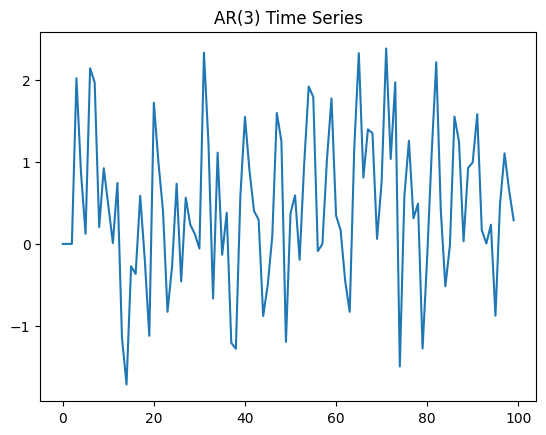

In [15]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

np.random.seed(42)
n_obs = 100
a0, a1, a2, a3 = 0.5, 0.3, -0.2, 0.1
epsilon = np.random.normal(0, 1, n_obs)
xt = np.zeros_like(epsilon)

for t in range(3, n_obs):
    xt[t] = a0 + a1 * xt[t-1] + a2 * xt[t-2] + a3 * xt[t-3] + epsilon[t]

lags = 3
model = sm.tsa.AutoReg(xt, lags=lags)
result = model.fit()

print(result.params)

adf_result = adfuller(xt)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

if adf_result[1] < 0.05:
    print("Временной ряд стационарен (p-значение < 0.05)")
else:
    print("Временной ряд нестационарен (p-значение >= 0.05)")

import matplotlib.pyplot as plt
plt.plot(xt)
plt.title('AR(3) Time Series')
plt.show()


 Случайным образом выбираются начальные значения временного ряда, и затем порождаются значения по авторегрессионной модели. Шум добавляется из нормального распределения, обеспечивая стационарность.

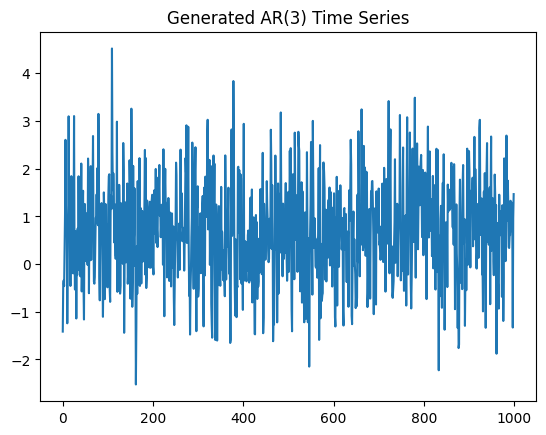

In [16]:
initial_values = np.random.normal(0, 1, lags)

new_obs = 1000
new_xt = np.zeros(new_obs)
new_xt[:lags] = initial_values

for t in range(lags, new_obs):
    new_xt[t] = a0 + a1 * new_xt[t-1] + a2 * new_xt[t-2] + a3 * new_xt[t-3] + np.random.normal(0, 1)

# Построим график
plt.plot(new_xt)
plt.title('Generated AR(3) Time Series')
plt.show()


Создаются векторы задержек, представляющие значения временного ряда на разных временных точках, с учетом указанного числа задержек (lags). Исходные данные разделяются на обучающую и тестовую выборки в соотношении 80/20 для оценки производительности модели на непройденных данных. StandardScaler используется для нормализации обучающего и тестового наборов данных.

Для каждого типа ядра (linear, poly, rbf) строится модель SVM регрессии на обучающих данных и оценивается на тестовых данных. Рассчитывается MSE для каждого типа ядра, предоставляя метрику качества предсказания модели. В случае линейного ядра выводятся коэффициенты регрессии, а для других ядер - двойственные коэффициенты.


Создаются векторы задержек для нового временного ряда, нормализуются, и на основе обученной модели SVM делается предсказание для нового временного ряда. Строится график, сравнивающий оригинальный временной ряд с предсказанным для тестовых данных для каждого типа ядра.

Autoregressive Coefficients for AR(3) model: [ 0.4135713   0.03473094 -0.09917299 -0.02964565]
Mean Squared Error for linear kernel: 0.7858843362994358
Support Vector Machine Regression Coefficients for linear kernel: [[-0.0362064  -0.23200017  0.24149899]]


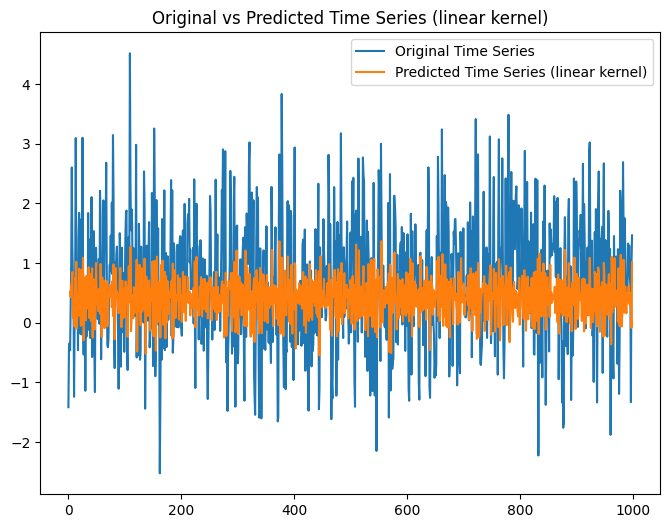

Mean Squared Error for poly kernel: 1.285328770229134
Support Vector Machine Regression Dual Coefficients for poly kernel: [[-1.          1.          1.         -1.          1.         -1.
  -1.          1.          1.         -1.          1.          1.
   1.          1.         -1.         -1.          1.         -1.
   0.9140704   1.         -1.          1.          1.         -1.
  -0.72613881  1.          1.          1.          1.         -1.
  -1.          1.          1.         -0.57245437 -1.          1.
  -1.         -1.          1.         -1.         -1.          1.
   1.          1.         -1.         -1.          1.         -0.87880518
  -1.         -1.         -1.         -0.5350258  -1.          1.
   1.          0.32832561  1.         -1.         -0.17211432 -1.
   1.         -1.          1.          0.19431654 -1.         -1.
  -1.          0.44782594 -1.          1.        ]]


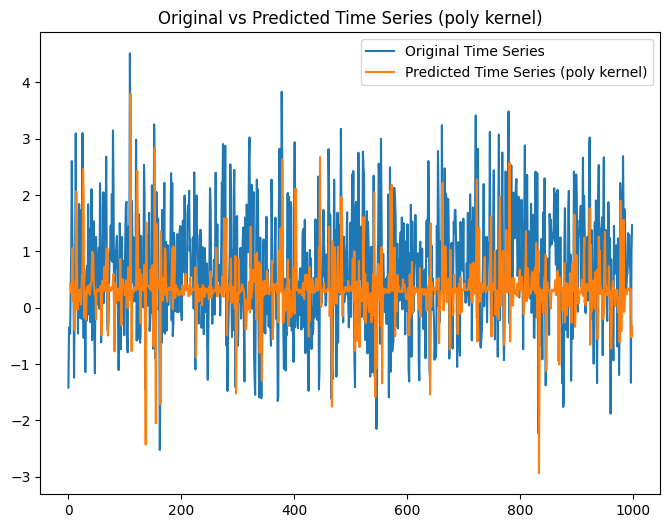

Mean Squared Error for rbf kernel: 0.8719523119278128
Support Vector Machine Regression Dual Coefficients for rbf kernel: [[-1.          1.          1.         -1.          1.          1.
   1.         -1.         -1.          1.         -1.          1.
   1.          0.99620904  1.          1.         -1.         -1.
   0.47356894 -1.          1.          0.3889571   1.         -1.
  -0.88336117 -1.          1.          1.          1.          0.63264634
  -1.         -1.          1.          1.         -0.38060707  1.
   0.61230379 -1.         -1.          1.         -0.26567975 -1.
   1.          1.          1.          0.08588877 -1.         -0.95031268
  -1.         -1.          0.17237793 -1.         -1.          1.
   0.22817326 -1.          1.         -0.76917216 -1.          1.
  -1.          1.         -1.         -1.         -1.         -1.
   0.65900766 -1.          1.        ]]


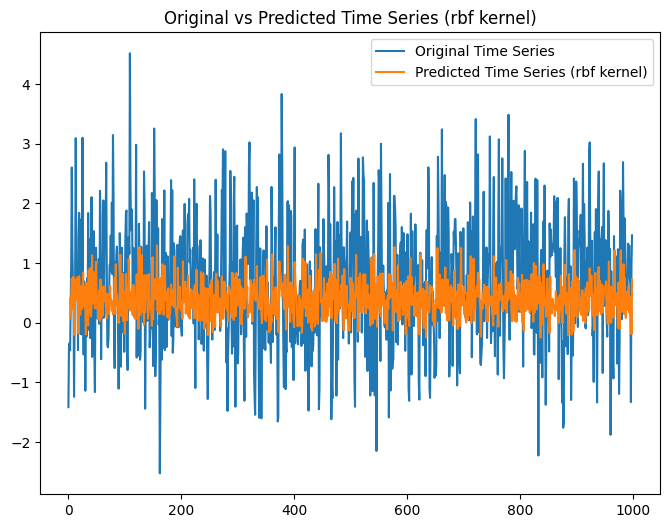

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def create_lag_vectors(series, lags):
    X = np.zeros((len(series)-lags, lags))
    y = series[lags:]
    
    for i in range(lags):
        X[:, i] = series[i:len(series)-lags+i]
    
    return X, y

lags = 3
X, y = create_lag_vectors(xt, lags)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Обучение модели AR(3)
model = sm.tsa.AutoReg(y_train, lags=lags)
result = model.fit()

# Вывод коэффициентов авторегрессии
print(f'Autoregressive Coefficients for AR(3) model: {result.params}')

kernel_types = ['linear', 'poly', 'rbf']

for kernel_type in kernel_types:
    plt.figure(figsize=(8, 6))
    model = SVR(kernel=kernel_type)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f'Mean Squared Error for {kernel_type} kernel: {mse}')
    
    if kernel_type == 'linear':
        print(f'Support Vector Machine Regression Coefficients for {kernel_type} kernel:', model.coef_)
    else:
        print(f'Support Vector Machine Regression Dual Coefficients for {kernel_type} kernel:', model.dual_coef_)
    
    new_X, _ = create_lag_vectors(new_xt, lags)
    new_X_scaled = scaler.transform(new_X)
    new_xt_pred = model.predict(new_X_scaled)

    plt.plot(new_xt, label='Original Time Series')
    plt.plot(np.arange(lags, len(new_xt)), new_xt_pred, label=f'Predicted Time Series ({kernel_type} kernel)')
    plt.title(f'Original vs Predicted Time Series ({kernel_type} kernel)')
    plt.legend()
    plt.show()
